In [1]:
# Copyright 2021 IITK EE604A Image Processing. All Rights Reserved.
# 
# Licensed under the MIT License. Use and/or modification of this code outside of EE604 must reference:
#
# © IITK EE604A Image Processing 
#
# Author: Dheeraj Bharti, Chiranjeev Prachand and Prof Tushar Sandhan, Department of Electrical Engineering, IIT Kanpur

In [2]:
## References for Question 3, Question 4 and Question 5
## https://medium.com/jun-devpblog/cv-6-structure-extraction-with-hough-transform-line-circle-aaf8be62f169
## https://homepages.inf.ed.ac.uk/rbf/HIPR2/hough.htm

In [3]:
import numpy as np
import imageio
import math
import matplotlib.pyplot as plt

Upload 'pic1.png' file manually to your google colab working directory:

1. Click on the folder drawing button on the left below the <> sign.
2. Click on Upload to session storage button to upload the image.

In [4]:
img = imageio.imread('pic1.png')   

Please refer lecture slides for hints for applying the algorithm.

Also, for clarity, looking at every variable's values and dimensions is recommended.

In [5]:
def line_detect_hough(img, angle_step=1, lines_are_white=True, value_threshold=5):
    
    """
    Input:

    img - 2-D binary image
    
    angle_step - Spacing between angles between -90 and 90 degrees. Default step is 1.

    lines_are_white - boolean indicating whether lines to be detected are white

    value_threshold - Pixel values above or below the value_threshold are edges

    Returns:
    
    accumulator - 2D array of the hough transform accumulator
    
    theta - Array of angles used in computation, in radians.
    
    rhos - Array of rho values. Max size is 2 times the diagonal
           distance of the input image.
    """

    thetas = np.deg2rad(np.arange(-90.0, 90.0, angle_step))
    num_thetas = len(thetas) 
    width, height = img.shape
    diag_len = int(round(math.sqrt(width * width + height * height)))
    rhos = np.linspace(-diag_len, diag_len, diag_len * 2)
    num_rhos = len(rhos)

    #######################################################################
    # Write code according to the instruction written infront of the line.
    #######################################################################

    # Write your code here #    ## Using numpy function np.cos, calculate cosine values of theta and store in variable cos_t ## 
    cos_t = np.cos(thetas)
    # Write your code here #    ## Using numpy function np.sin, calculate sine values of theta and store in variable sin_t ##
    sin_t = np.sin(thetas)

    #######################################################################
    # Write code according to the instruction written infront of the line.
    #######################################################################
    
    
    # Write your code here #    ## Using numpy, declare a zero matrix of Hough accumulator array #
                                 # of theta vs rho of size (2*diag_len, num_thetas), keep dtype=np.uint8, name it accumulator ##
    accumulator = np.zeros((num_rhos, num_thetas))
  
    #######################################################################
    # Write code according to the instruction written infront of the line.
    #######################################################################
    
    # Write your code here #    ## In the img matrix, find where are black and white pixels # 
                                 # and store the indexes of the white edge pixels in x_idxs and y_idxs ## 
    x_idxs = []
    y_idxs = []
    for i in range(width):
        for j in range(height):
            if img[i,j] >= 250:
                x_idxs.append(i)
                y_idxs.append(j)
                
    #######################################################################
    # Write code according to the instruction written infront of the line.
    #######################################################################
    
    # Write your code here #    ## Write a for loop inside a for loop to do voting in accumulator; the first one recurses through x_idxs #
                                 # the second one recurses through thetas; in which  #
                                 # for every value of thetas[i], calculate rho value using rho = diag_len + int(round(x * cos_t[i] + y * sin_t[i])) formula #
                                 # and increment the accumulator for that specific (rho, theta)
    rhos = rhos.astype(int)
    for i in range(len(x_idxs)):
        for j in range(len(thetas)):
            rho_val = int(round(x_idxs[i] * cos_t[j] + y_idxs[i] * sin_t[j]))
            k = np.where(rhos == rho_val)
            accumulator[k,j] += 1
            
    return accumulator, thetas, rhos

In [6]:
## Do not change anything in this block ##

def display_hough(img, accumulator, thetas, rhos, save_path=None):
    
    fig, ax = plt.subplots(1, 2, figsize=(10, 20))

    ax[0].imshow(img, cmap=plt.cm.gray)
    ax[0].set_title('Input image')
    ax[0].axis('image')

    ax[1].imshow(
        accumulator, cmap='jet',
        extent=[np.rad2deg(thetas[-1]), np.rad2deg(thetas[0]), rhos[-1], rhos[0]])
    ax[1].set_aspect('equal', adjustable='box')
    ax[1].set_title('Hough transform')
    ax[1].set_xlabel('Angles (degrees)')
    ax[1].set_ylabel('Distance (pixels)')
    ax[1].axis('image')


Click on Runtime and select Run all before submitting this file.

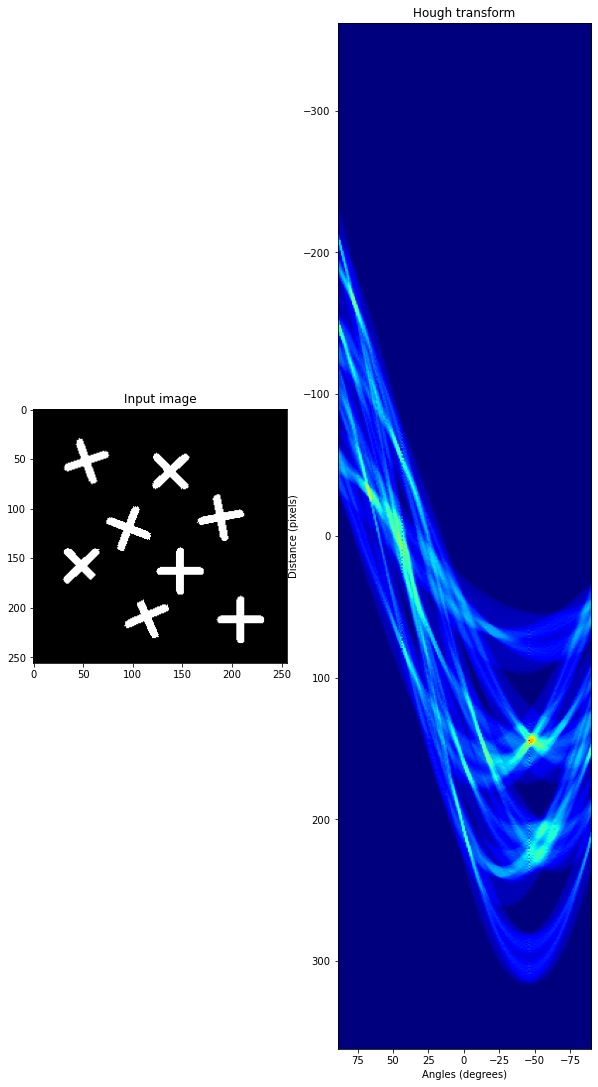

In [7]:
accumulator, thetas, rhos = line_detect_hough(img)
display_hough(img, accumulator, thetas, rhos)

In [8]:
## In this block, print the maxima(s) in the accumulator 
## and the rho,theta value(s) for which it occurs.
## You are allowed to use the above functions and modify them inside this block (if required).

def convolve2D(image, kernel, padding=0, strides=1):
    """
    This function does the 2D convolution operation.
    Input:
    image - 2-D np array of an image
    kernel - 2-D np array of kernel.
    padding - flag (0 or 1) - if padding is required or not
    strides - int - stride value while moving the kernel on image
    
    Returns:
    output - 2D array of convolved image
    
    Used libraries:
    Numpy only
    """
    # Cross Correlation
    kernel = np.flipud(np.fliplr(kernel))

    # Gather Shapes of Kernel + Image + Padding
    xKernShape = kernel.shape[0]
    yKernShape = kernel.shape[1]
    xImgShape = image.shape[0]
    yImgShape = image.shape[1]

    # Shape of Output Convolution
    xOutput = int(((xImgShape - xKernShape + 2 * padding) / strides) + 1)
    yOutput = int(((yImgShape - yKernShape + 2 * padding) / strides) + 1)
    output = np.zeros((xOutput, yOutput))

    # Apply Equal Padding to All Sides
    if padding != 0:
        imagePadded = np.zeros((image.shape[0] + padding*2, image.shape[1] + padding*2))
        imagePadded[int(padding):int(-1 * padding), int(padding):int(-1 * padding)] = image
        print(imagePadded)
    else:
        imagePadded = image

    # Iterate through image
    for y in range(image.shape[1]):
        # Exit Convolution
        if y > image.shape[1] - yKernShape:
            break
        # Only Convolve if y has gone down by the specified Strides
        if y % strides == 0:
            for x in range(image.shape[0]):
                # Go to next row once kernel is out of bounds
                if x > image.shape[0] - xKernShape:
                    break
                try:
                    # Only Convolve if x has moved by the specified Strides
                    if x % strides == 0:
                        output[x, y] = (kernel * imagePadded[x: x + xKernShape, y: y + yKernShape]).sum()
                except:
                    break

    return output

def gaussianFilter(img, kernel_size=5, sigma=3, padding=0, strides=1):
    '''
    same as developed for Assgn2 Q1
    Inputs:
    + img - grayscaled image of size N x N
          - values between [0, 255] - 'uint8'
    + kernel_size - size of the kernel window which should be used for smoothing. 
    + sigma - sigma parameter for gaussian kernel
    
    Ouputs:
    + out_img - smoothed grayscaled image of size N x N
              - values between [0, 255] - 'uint8'

    '''
    mid = (kernel_size-1)/2
    normal = 1/(np.sqrt(2*np.pi*(sigma**2))) 
    x_k = np.zeros(kernel_size)
    for i in range(kernel_size):
        x = mid-i
        x_k[i] = normal * np.exp(-(x**2)/(2*(sigma**2)))
        
    x_k = x_k.reshape((len(x_k), 1))
    y_k = x_k
    kernel = x_k.dot(y_k.T)
    kernel = kernel/np.sum(kernel)
    out_img = convolve2D(img, kernel, padding, strides)
    out_img.astype(int)   
    return out_img

def find_local_max(img):
    """
    This function finds local maxima in a 3x3 area.
    Input:
    img - 2-D np array of an image
    
    Returns:
    nms_im - 2D array of image where local maxima has nonzero values only
    
    Used libraries:
    Numpy only
    """
    nms_im = np.zeros((n_rows, n_cols));
    for i in range(1,n_rows-1):
        for j in range(1,n_cols-1):  
                a = img[i, j+1]
                b = img[i, j-1]

                c = img[i+1, j-1]
                d = img[i-1, j+1]

                e = img[i+1, j]
                f = img[i-1, j]

                g = img[i-1, j-1]
                h = img[i+1, j+1]

                if (img[i,j] >= a) and (img[i,j] >= b) and (img[i,j] >= c) and (img[i,j] >= d) and (img[i,j] >= e) and (img[i,j] >= f) and (img[i,j] >= g) and (img[i,j] >= h):
                    nms_im[i,j] = img[i,j]
                else:
                    nms_im[i,j] = 0
    return nms_im

def get_theta_rad(line_candidate_idx, thetas, rhos):
    """
    This is a problem specific function which uses index from line_candidate_idx
    to find corresponding thetas and rhos value
    Input:
    line_candidate_idx - list of 2 elements where 1st is tuple of rho indices,
                            1st is tuple of theta indices
    
    Returns:
    theta_candid - 1d array of corresponding theta values.
    rho_candid - 1d array of corresponding rho values.
    
    Used libraries:
    Numpy only
    """
    no_candid = len(line_candidate_idx[0])
    theta_candid = []
    rho_candid = []
    for i in range(no_candid):
        lci0 = line_candidate_idx[0][i]
        lci1 = line_candidate_idx[1][i]

        theta_candid.append(round(np.rad2deg(thetas[lci1])*100)/100)
        rho_candid.append(rhos[lci0])


    theta_candid = np.array(theta_candid)
    rho_candid = np.array(rho_candid)
    return theta_candid, rho_candid

###################################  MAIN  ##########################################
# Write your code here #
kernel_size=5
sigma=1
th = 65
smooth_accum = gaussianFilter(accumulator, kernel_size=5, sigma=3)
n_rows, n_cols = smooth_accum.shape
th_img = np.zeros((n_rows, n_cols))
for i in range(n_rows):
    for j in range(n_cols):
        if smooth_accum[i,j] > th:
            th_img[i,j] = smooth_accum[i,j]

locmax_img = find_local_max(th_img)
line_candidate_idx = np.nonzero(locmax_img)
theta_candid, rho_candid = get_theta_rad(line_candidate_idx, thetas, rhos)
print("--------------------------------------------------------------------------------------------------------------------")
print("---------------------------------The probable rho and theta (deg) candidates are -----------------------------------")

for i in range(len(theta_candid)):
    print("rho = ",rho_candid[i], "theta = ",theta_candid[i] )
print("--------------------------------------------------------------------------------------------------------------------")



--------------------------------------------------------------------------------------------------------------------
---------------------------------The probable rho and theta (deg) candidates are -----------------------------------
rho =  -31 theta =  -69.0
rho =  -10 theta =  -52.0
rho =  4 theta =  -47.0
rho =  27 theta =  -42.0
rho =  31 theta =  -41.0
rho =  35 theta =  -40.0
rho =  38 theta =  -39.0
rho =  142 theta =  45.0
rho =  155 theta =  15.0
rho =  205 theta =  52.0
rho =  222 theta =  50.0
--------------------------------------------------------------------------------------------------------------------
